##Disease Prediction from Medical Data






The "Disease Prediction from Medical Data" dataset is a comprehensive collection of medical records designed to facilitate the development of machine learning models for disease prediction. It includes a variety of features such as patient demographics, medical history, laboratory test results, and clinical observations. These features serve as inputs for predictive algorithms aimed at identifying potential health conditions based on the provided data. The dataset is structured to support the training and evaluation of classification models, enabling healthcare professionals and researchers to explore predictive analytics in medical diagnostics.

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier

# 2. Reading the Dataset

In [ ]:
import csv

header = None
new_file = []
for f in ('/content/Testing.csv', '/content/Training.csv'):
    with open(f, newline='') as csv_file:
        reader = csv.reader(csv_file)
        if not header:
            new_file.append(next(reader))
            header = True
        else:
            next(reader)
        for row in reader:
            new_file.append(row)

with open('data.csv', 'w', newline='') as csv_out:
    writer = csv.writer(csv_out)
    writer.writerows(new_file)




In [ ]:
data = pd.read_csv("/content/data.csv")

In [ ]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


#First 5 rows of the dataset

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


#Last 5 rows of the dataset

In [ ]:
data.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


#List of categorical features

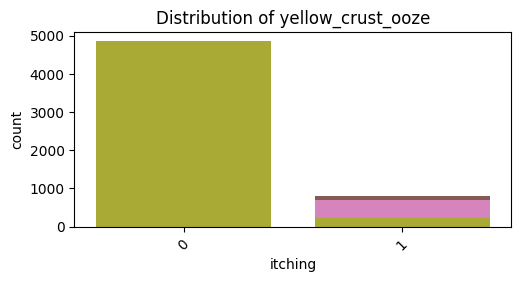

In [ ]:
categorical_features = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
                        'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'blackheads',
                        'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
                        'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Loop through the features and create a subplot for each
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3,5)  # 6 rows, 3 columns
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Shape of the dataset


In [ ]:
print(data.shape)

(4961, 133)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Rename the columns in the dataset
data.columns = data.columns.str.replace(' ', '_').str.replace('[', '').str.replace(']', '')

print(data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [ ]:
import pandas as pd

unique_values = data['prognosis'].unique()

print("Unique values in 'prognosis' column:", unique_values)


Unique values in 'prognosis' column: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


#Converting Chategorical Values to numerical Values

In [ ]:
 from sklearn import preprocessing
 le = preprocessing.LabelEncoder()
 le.fit(data.prognosis)
 data['prognosis'] = le.transform(data.prognosis)


#Heatmap for Correlation:

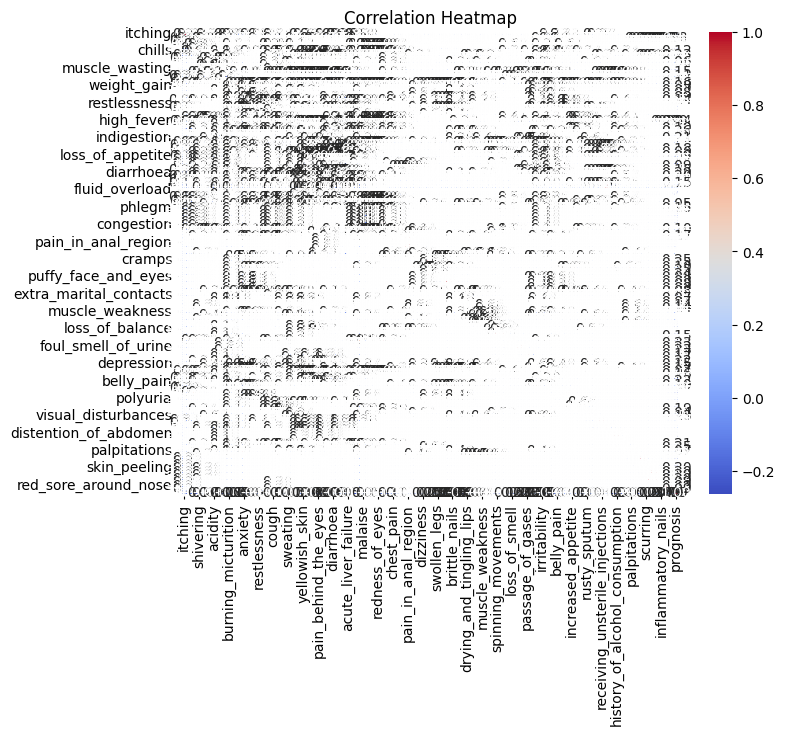

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Checking for missing data after preprocessing


In [ ]:
data.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318546,0.326935,-0.086962,-0.059939,-0.176002,-0.160738,0.203061,-0.086962,-0.059939,...,-0.059939,-0.059939,-0.061605,-0.061605,-0.061605,-0.061605,-0.061605,-0.061605,-0.061605,-0.151944
skin_rash,0.318546,1.000000,0.298594,-0.094852,-0.065377,-0.029355,0.171206,0.162108,-0.094852,-0.065377,...,0.321108,0.321108,0.331238,0.331238,0.331238,0.331238,0.331238,0.331238,0.331238,-0.146621
nodal_skin_eruptions,0.326935,0.298594,1.000000,-0.032593,-0.022465,-0.065965,-0.060244,-0.032593,-0.032593,-0.022465,...,-0.022465,-0.022465,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.063337
continuous_sneezing,-0.086962,-0.094852,-0.032593,1.000000,0.609786,0.446702,-0.087404,-0.047287,-0.047287,-0.032593,...,-0.032593,-0.032593,-0.033499,-0.033499,-0.033499,-0.033499,-0.033499,-0.033499,-0.033499,-0.237443
shivering,-0.059939,-0.065377,-0.022465,0.609786,1.000000,0.295804,-0.060244,-0.032593,-0.032593,-0.022465,...,-0.022465,-0.022465,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.023089,-0.202679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061605,0.331238,-0.023089,-0.033499,-0.023089,-0.067798,0.360037,-0.033499,-0.033499,-0.023089,...,-0.023089,-0.023089,0.946588,0.946588,0.946588,1.000000,-0.023731,-0.023731,-0.023731,0.195292
blister,-0.061605,0.331238,-0.023089,-0.033499,-0.023089,-0.067798,-0.061918,-0.033499,-0.033499,-0.023089,...,-0.023089,-0.023089,-0.023731,-0.023731,-0.023731,-0.023731,1.000000,0.946588,0.946588,0.091136
red_sore_around_nose,-0.061605,0.331238,-0.023089,-0.033499,-0.023089,-0.067798,-0.061918,-0.033499,-0.033499,-0.023089,...,-0.023089,-0.023089,-0.023731,-0.023731,-0.023731,-0.023731,0.946588,1.000000,0.946588,0.091136
yellow_crust_ooze,-0.061605,0.331238,-0.023089,-0.033499,-0.023089,-0.067798,-0.061918,-0.033499,-0.033499,-0.023089,...,-0.023089,-0.023089,-0.023731,-0.023731,-0.023731,-0.023731,0.946588,0.946588,1.000000,0.091136


#Removing the Columns which has less realation with Class Label

In [ ]:
low_correlation_threshold = 0.05
correlation_matrix = data.corr()

correlation_with_survived = correlation_matrix['prognosis'].abs()

# Identify columns with correlation above the threshold
columns_to_keep = correlation_with_survived[correlation_with_survived >= low_correlation_threshold].index

# Drop columns with correlation below the threshold
data = data[columns_to_keep]

print("Filtered Columns):")
col = data.columns
print(col)

Filtered Columns):
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=111)


# Plot the distribution of the target variable

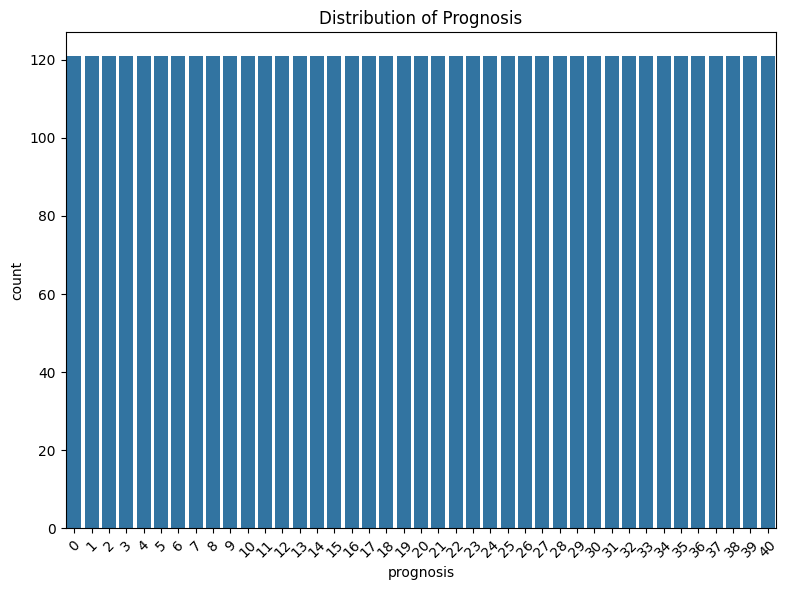

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='prognosis', data=data)
plt.title('Distribution of Prognosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Display the updated DataFrame

In [ ]:
col = data.columns
print(col)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=111)


In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


#4. Splitting the data

In [ ]:
X = data.drop(columns=['prognosis'])
y = data['prognosis']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4961, 110)
y shape: (4961,)


In [ ]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [ ]:
y

,prognosis
0,15
1,4
2,16
3,9
4,14
...,...
4956,0
4957,2
4958,38
4959,35


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the original class distribution in the training set
print("Original class distribution in y_train:")
print(y_train.value_counts())

# Handle class imbalance in the training set with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the resampled class distribution in the training set
print("\nResampled class distribution in y_train_resampled:")
print(y_train_resampled.value_counts())


Original class distribution in y_train:
prognosis
7     103
0     102
23    102
15    102
28    101
8     101
39    101
18    101
12    101
30    101
38    100
13     99
29     99
10     99
22     99
9      99
5      99
4      98
20     98
21     98
14     97
2      97
40     96
1      96
34     96
3      96
6      95
19     95
25     95
11     94
26     94
17     94
27     94
36     93
31     93
24     93
32     92
37     91
33     90
16     88
35     86
Name: count, dtype: int64

Resampled class distribution in y_train_resampled:
prognosis
24    103
13    103
3     103
14    103
8     103
25    103
40    103
11    103
21    103
28    103
34    103
20    103
6     103
38    103
4     103
0     103
31    103
36    103
15    103
39    103
10    103
7     103
29    103
23    103
9     103
5     103
17    103
18    103
22    103
12    103
35    103
37    103
33    103
30    103
32    103
27    103
26    103
1     103
19    103
2     103
16    103
Name: count, dtype: int64



# Check class distribution before and after resampling


In [ ]:
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Original class distribution: prognosis
7     103
0     102
23    102
15    102
28    101
8     101
39    101
18    101
12    101
30    101
38    100
13     99
29     99
10     99
22     99
9      99
5      99
4      98
20     98
21     98
14     97
2      97
40     96
1      96
34     96
3      96
6      95
19     95
25     95
11     94
26     94
17     94
27     94
36     93
31     93
24     93
32     92
37     91
33     90
16     88
35     86
Name: count, dtype: int64
Resampled class distribution: prognosis
24    103
13    103
3     103
14    103
8     103
25    103
40    103
11    103
21    103
28    103
34    103
20    103
6     103
38    103
4     103
0     103
31    103
36    103
15    103
39    103
10    103
7     103
29    103
23    103
9     103
5     103
17    103
18    103
22    103
12    103
35    103
37    103
33    103
30    103
32    103
27    103
26    103
1     103
19    103
2     103
16    103
Name: count, dtype: int64


In [ ]:
# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (3968, 110)
Testing features shape: (993, 110)
Training labels shape: (3968,)
Testing labels shape: (993,)


5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified hyperparameters
log_reg_model = LogisticRegression(
    C=1,  # Regularization strength
    penalty='l2',  # Regularization type, 'l2' is the most common
    solver='lbfgs',  # Optimization algorithm (good for larger datasets)
    max_iter=1000,  # Maximum number of iterations for optimization
    random_state=42,  # For reproducibility
    l1_ratio=None,  # Only used if 'elasticnet' penalty is chosen
)

# Train the model on the training data (X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = log_reg_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [ ]:
 from sklearn.metrics import classification_report
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00

In [ ]:

print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.98
-------------------------------------------------------------------


#B. Implementation of SVM and analysing the perfomance

In [ ]:
 from sklearn.svm import SVC
 # Building a Support Vector Machine on train data
 svc_model = SVC(kernel='linear',random_state=1234, gamma= 'scale')
 svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1234)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
 # import the metrics class

 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        33
  

In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.98
-------------------------------------------------------------------


#C. Implimenting KNN Classifier and analysing the perfomance

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        33
  

In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.97
-------------------------------------------------------------------


#D. Implimentation of Decision Tree Classifier and analysing the perfomance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1234),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
 # import the metrics class
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        33
  

In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.98
-------------------------------------------------------------------


In [ ]:
------------------------------------------------  THE END   -------------------------------------------------